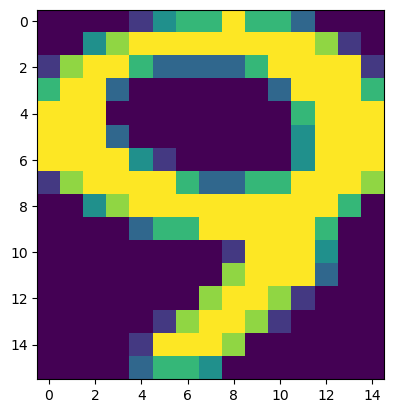

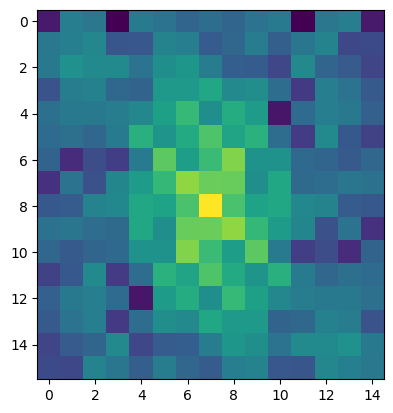

In [1]:
# Machine learning model code goes here
#first load the train and test data set
import os
import pandas as pd
import numpy as np
from visualise import plot_digi_fig
import matplotlib.pyplot as plt
from dataloader import FFT_transform, FFT_transform_PM

entries = os.listdir('Data/')
#print(entries)
train_data=[k for k in entries if 'train' in k]
#print(train_data)

X_title_train=[]
flat_data_train=[]
X_data_train = []
X_data_train_phase=[]
flat_data_train_phase=[]
for entry in train_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))
    
            #here we apply the FFT transform
            mag_val, phase_val = FFT_transform_PM(mat_r)
            #break
            X_data_train.append(mag_val)
            X_data_train_phase.append(phase_val)
            X_title_train.append(int(res))
            flat_data_train.append(mag_val.flatten())
            flat_data_train_phase.append(phase_val.flatten())
    #X_data.append (image)
test_data=[k for k in entries if 'test' in k]
#print(test_data)

#create nested lists for storing reasons
X_title_test=[]
X_data_test = []
flat_data_test=[]
X_data_test_phase=[]
flat_data_test_phase=[]
for entry in test_data:
    name=entry
    
    res = "".join([ele for ele in entry if ele.isdigit()])  # keep only the integer part of the path
    #print(entry)
    with open('Data/'+name) as f:
        #print(f)
        for line in f:
            curr = line.strip()
            mat = np.fromstring(curr, dtype=int, sep='  ')
            mat_r = np.reshape(mat, (-1, 15))   

            mag_val, phase_val = FFT_transform_PM(mat_r)
            #break
            #magnitude
            X_data_test.append(mag_val)
            X_data_test_phase.append(phase_val)
            X_title_test.append(int(res))
            flat_data_test.append(mag_val.flatten())
            flat_data_test_phase.append(phase_val.flatten())
    #X_data.append (image)
    
    
#calculate the labels of the data
'''
res_train=[]
res_train = [sub.replace('.txt', '') for sub in X_title_train]
res_train = [sub.replace('train_', '') for sub in res_train]
res_train = [eval(i) for i in res_train]
X_train_lable=res_train
'''
X_train_lable = X_title_train
'''
res_test=[]
res_test = [sub.replace('.txt', '') for sub in X_title_test]
res_test = [sub.replace('test_', '') for sub in res_test]
res_test = [eval(i) for i in res_test]
X_test_lable=res_test
'''
X_test_lable = X_title_test
#print(res_test)
#print(X_title_train)

In [2]:
x_train=flat_data_train
x_train_phase= flat_data_train_phase # added the phase values 
#here I just convert nan to numbers but we might want to look deeper into where the nan values are coming from in the first place
x_train=np.nan_to_num(x_train)
x_train_phase = np.nan_to_num(x_train_phase)
#print(len(flat_data_train))
y_train=X_train_lable
#print(len(y_train))
x_test=flat_data_test
x_test_phase = flat_data_test_phase
x_test=np.nan_to_num(x_test)
x_test_phase= np.nan_to_num(x_test_phase)
y_test=X_test_lable

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

C:\Users\maria\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier: Magnitude accuracy:
75.2
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       100
           1       0.88      0.86      0.87       100
           2       0.77      0.81      0.79       100
           3       0.79      0.80      0.80       100
           4       0.87      0.86      0.86       100
           5       0.84      0.81      0.83       100
           6       0.35      0.36      0.36       100
           7       0.91      0.89      0.90       100
           8       0.89      0.83      0.86       100
           9       0.35      0.39      0.37       100

    accuracy                           0.75      1000
   macro avg       0.76      0.75      0.76      1000
weighted avg       0.76      0.75      0.76      1000



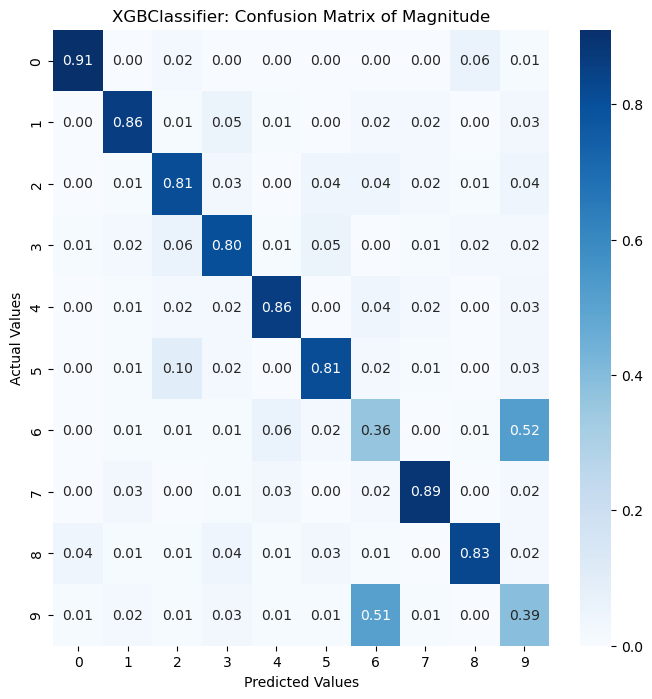

C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:20:01] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier:  Phase  accuracy:
88.1
[[95  1  0  0  1  0  1  1  1  0]
 [ 3 76  0  3  7  2  0  0  4  5]
 [ 3  0 94  0  0  0  1  0  2  0]
 [ 1  1  2 87  1  3  0  1  2  2]
 [ 0  3  0  1 88  0  5  0  0  3]
 [ 2  1  0  4  2 85  0  1  3  2]
 [ 0  1  0  2  1  3 91  0  2  0]
 [ 0  0  2  0  0  0  0 95  2  1]
 [ 5  4  0  4  1  5  4  0 75  2]
 [ 0  0  0  1  0  1  0  0  3 95]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       100
           1       0.87      0.76      0.81       100
           2       0.96      0.94      0.95       100
           3       0.85      0.87      0.86       100
           4       0.87      0.88      0.88       10

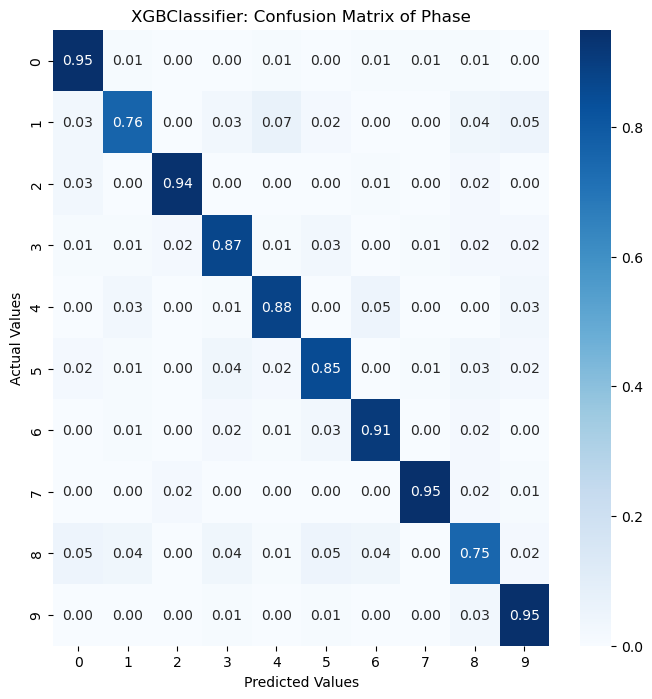

In [3]:
import xgboost as xgb
# clf = xgboost.XGBRegressor(alpha=c)
#clf = xgboost.sklearn.XGBClassifier(alpha=c)

xgb_model_mag = xgb.XGBClassifier(objective="multi:softmax", random_state=42,num_class=10,
                             learning_rate=0.01, n_estimators=400,eval_metric='mlogloss' ,
                             max_depth=6, # re-optimized from v2
                             reg_lambda=1 # default L2 value
                            )
xgb_model_mag.fit(x_train,y_train)

y_pred = xgb_model_mag.predict(x_test)
y_test = np.asarray(y_test)
print("XGBClassifier: Magnitude accuracy:")
print(round(sum(y_pred==y_test)/len(y_test)*100,1))

cm4 = confusion_matrix(y_test, y_pred,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm4, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('XGBClassifier: Confusion Matrix of Magnitude')
plt.show()
fig.savefig('Conf_Matrix_XGBClassifier_AMPL.png',bbox_inches='tight',dpi=150)

xgb_model_pha = xgb.XGBClassifier(objective="multi:softmax", random_state=42,num_class=10,
                             learning_rate=0.02, n_estimators=600,
                             max_depth=5, # re-optimized from v2
                             reg_lambda=1 # default L2 value
                            )
xgb_model_pha.fit(x_train_phase,y_train)

y_pred = xgb_model_pha.predict(x_test_phase)
y_test = np.asarray(y_test)
print("XGBClassifier:  Phase  accuracy:")
print(round(sum(y_pred==y_test)/len(y_test)*100,1))
print(confusion_matrix(y_test, y_pred))

cm5 = confusion_matrix(y_test, y_pred,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_pred)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm5, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('XGBClassifier: Confusion Matrix of Phase')
plt.show()
fig.savefig('Conf_Matrix_XGBClassifier_PHS.png',bbox_inches='tight',dpi=150)

## we can run the voting technique here


XGBClassifier: Combined Phase and Magnitude accuracy:
91.6
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       100
           1       0.91      0.96      0.93       100
           2       0.90      0.95      0.93       100
           3       0.91      0.92      0.92       100
           4       0.92      0.91      0.91       100
           5       0.93      0.85      0.89       100
           6       0.90      0.84      0.87       100
           7       0.97      0.95      0.96       100
           8       0.91      0.88      0.89       100
           9       0.88      0.94      0.91       100

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



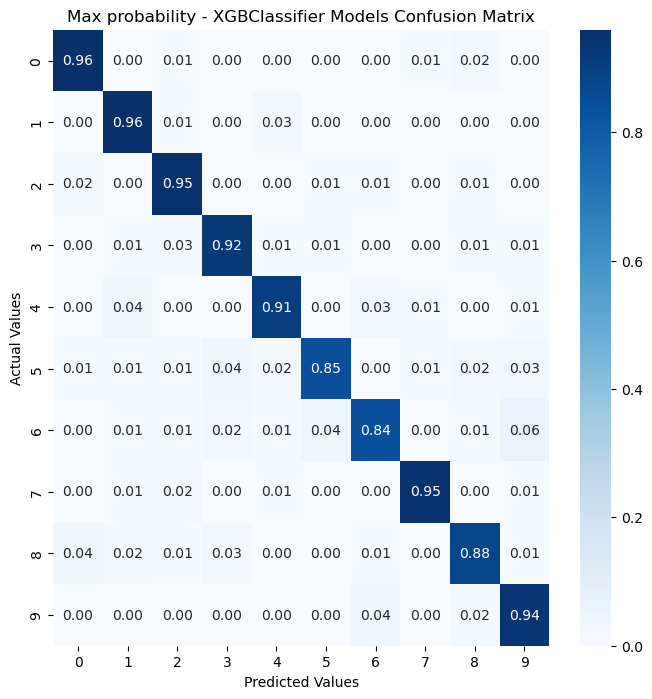

In [4]:
######################--------------Voting / Ensemble learning-----------######################
#The main idea is to combine the output of the two SVM classifiers based on 
#the individual probability per class

from sklearn.linear_model import LogisticRegression

y_prob       = xgb_model_mag.predict_proba(x_test)  #probabilities for each class (magnitude)
y_phase_prob = xgb_model_pha.predict_proba(x_test_phase)    #probabilities for each class (phase)
y_ensemble   = []
#We iterate on all the test rows and compared the highest probability per classifier
for i in range(len(y_prob)):
    if max(y_prob[i])>max(y_phase_prob[i]):
        y_ensemble.append(np.argmax(y_prob[i]))
    else:
        y_ensemble.append(np.argmax(y_phase_prob[i]))

y_ensemble = np.asarray(y_ensemble)
print("XGBClassifier: Combined Phase and Magnitude accuracy:")
print(round(sum(y_ensemble==y_test)/len(y_test)*100,1))
        
#visualize metrics for understanding in which classes we have bad predictions
cm_en = confusion_matrix(y_test, y_ensemble,normalize='true')
labels = ['0','1','2','3','4','5','6','7','8','9']
print(classification_report(y_test, y_ensemble)) 
fig, ax = plt.subplots(figsize=(8,8))
sns_plot = sns.heatmap(cm_en, annot=True, fmt='.2f', cmap='Blues',xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

plt.title('Max probability - XGBClassifier Models Confusion Matrix')
plt.show()
fig.savefig('Conf_Matrix_Combined_XGBClassifier_models.png',bbox_inches='tight',dpi=150)